In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rc("font",size=14)
os.chdir('C:\\Analytics\\MachineLearning\\titanic New dataset') #into the current directory
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

In [8]:
train_df = pd.read_csv('C:\\Analytics\\MachineLearning\\titanic New dataset\\train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test_df = pd.read_csv('C:\\Analytics\\MachineLearning\\titanic New dataset\\test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
print("The number of passengers into the traindata set is",train_df.shape[0])

The number of passengers into the traindata set is 891


In [13]:
print("The number of passengers into the testdata set is",test_df.shape[0])

The number of passengers into the testdata set is 418


# In the test data set target variable is missing i.e, survided,so now wed need to calculate using different machine learning algorithms using logistic regression

In [15]:
#Check the missing values in train dataset
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# From the above we got that Age having 177, and Cabin having 687 missing values

In [19]:
#Now check the how much percentage of age data is missing in entire dataset
print("The percentage of age data missing %.2f%%" % ((train_df['Age'].isnull().sum()/train_df.shape[0])*100))

The percentage of age data missing 19.87%


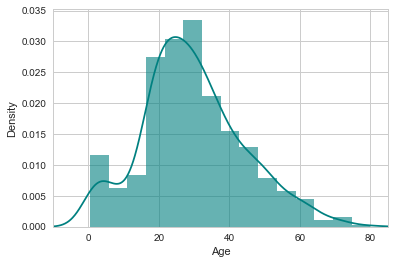

In [25]:
ax = train_df["Age"].hist(bins=15,density=True,stacked=True,color='teal',alpha=0.6)
train_df['Age'].plot(kind='density',color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()   

# The above histogram shows right skewed. mean or median . Mean may give biased result hence will go median values for missing vlaue imputation.

In [31]:
print("The mean value of age %.2f" % train_df['Age'].mean(skipna=True))  #29.70

print('The median of age is %.2f' %(train_df["Age"].median(skipna=True)))  #28.00

The mean value of age 29.70
The median of age is 28.00


# Now let's check Cabin value now

In [34]:
#percentage of missing of cabin value in entire dataset

print("The percentage of missing cabin value in entire dataset %.2f" % ((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

The percentage of missing cabin value in entire dataset 77.10


# 77% of records are missing, which means that imputing information and using this variable for prediction is probably not wise. We'll ignore this variable in our model.

# Now lets check Embark Missing values

In [35]:
print("percentage of missing embark values %.2f" % ((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

percentage of missing embark values 0.22


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


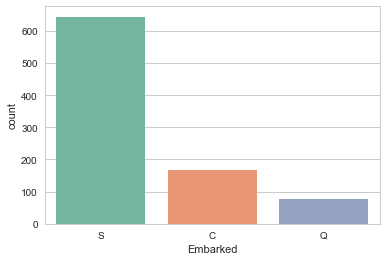

In [40]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts())
#showing the above in plot
sns.countplot(x='Embarked',data=train_df,palette='Set2')  #Set is having different colors, u can give Set1,Set3 etc
plt.show()

In [46]:
#The most common boarding point
print("The most common boarding point of embarkation is ",train_df['Embarked'].value_counts().idxmax())

The most common boarding point of embarkation is  S


In [ ]:
#By far the most passengers boarded in Southhampton, so we'll impute those 2 NaN's w/ "S".

In [ ]:
#Final Adjustment to Data
#1. In "Age" the missing value is refilled by median of Age value
#2. Most of the Embarked is from 'S' hence the 2 missing values to be filled by S
#3. Column Cabin is dropping bcz 77% of cabin data is missing which might not be good for model

In [48]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [49]:
train_data.isnull().sum() #Now no NA values are there

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [50]:
#preview adjust train data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


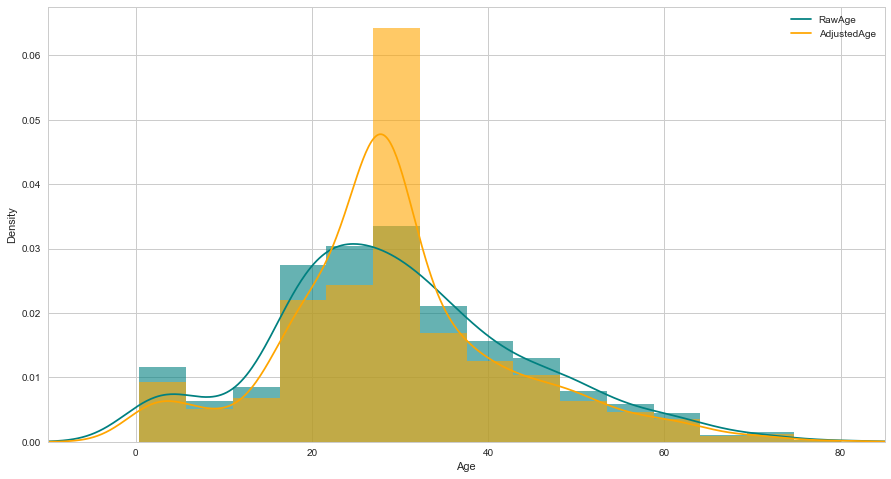

In [51]:
plt.figure(figsize=(15,8))
ax = train_df['Age'].hist(bins=15, density=True,stacked=True,color='teal',alpha=0.6)
train_df['Age'].plot(kind='density',color='teal')
ax = train_data['Age'].hist(bins=15,density=True,stacked=True,color='orange',alpha=0.6)
train_data['Age'].plot(kind='density',color='orange')
ax.legend(['RawAge','AdjustedAge'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

# Feature Engineering



In [53]:
#Adding of variables
# sibsp - Number of Siblings/Spouses Aboard
# parch - Number of Parents/Children Aboard
# ## Create categorical variable for traveling alone
train_data['TravelAlone'] = np.where((train_data['SibSp'] + train_data['Parch'])>0,0,1)

In [54]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [55]:
#now dropping 'SibSp' and 'Parch' columns
train_data.drop('SibSp',axis=1,inplace=True)
train_data.drop('Parch',axis=1,inplace=True)

In [56]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


In [60]:
#also create categorical variables for Passenger Class ("Pclass"), Gender ("Sex"), and Port Embarked ("Embarked").
training = pd.get_dummies(train_data,columns=['Pclass','Embarked','Sex'])
training.drop('Sex_female',axis=1,inplace=True)
training.drop('PassengerId',axis=1,inplace=True)
training.drop('Name',axis=1,inplace=True)
training.drop('Ticket',axis=1,inplace=True)
final_train = training

In [61]:
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


# Apply the same changes to test data

In [59]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [64]:
#replacing Age,Fare with median value and dropping Cabin
test_data = test_df.copy()
test_data['Age'].fillna(test_data['Age'].median(skipna=True),inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(skipna=True),inplace=True)
test_data.drop('Cabin',axis=1,inplace=True)

#Adding Feature TravelAlone
test_data['TravelAlone'] = np.where((test_data['SibSp'] + test_data['Parch']) > 0,0,1)
test_data.drop('SibSp',axis=1,inplace=True)
test_data.drop('Parch',axis=1,inplace=True)

testing = pd.get_dummies(test_data,columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()


,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


# Exploration of Age

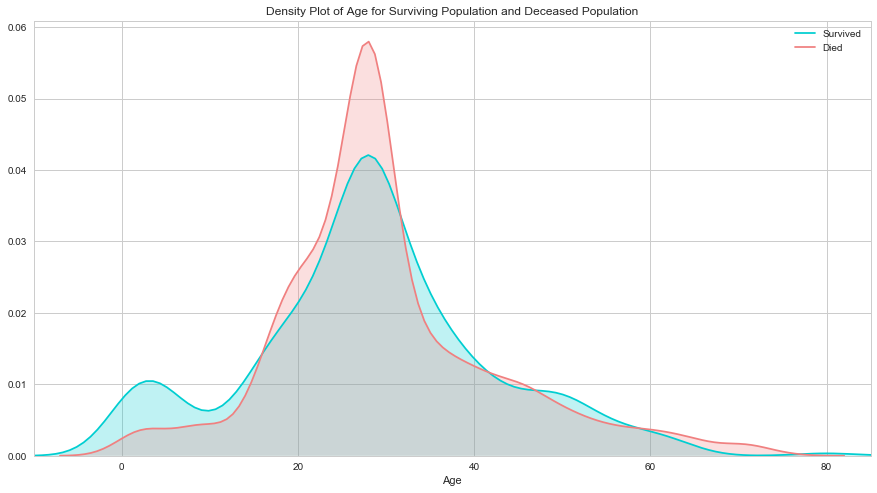

In [67]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

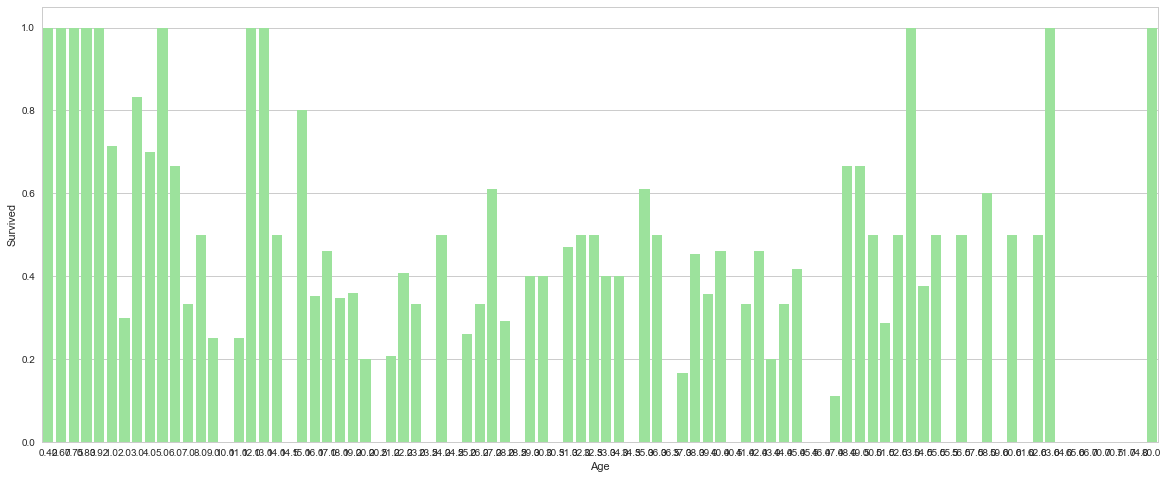

In [70]:
plt.figure(figsize=(20,8))
avg_survival_by_age = final_train[['Age','Survived']].groupby(['Age'],as_index=False).mean()
g = sns.barplot(x='Age',y='Survived',data=avg_survival_by_age,color='Lightgreen')
plt.show()

In [71]:
#Adding one new feature as minor, if less than 16yrs minor represent as 1
final_train['IsMinor'] = np.where(final_train['Age']<=16,1,0)
final_test['IsMinor'] = np.where(final_test['Age'] <=16,1,0)

In [72]:
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,7.2500,0,0,0,1,0,0,1,1,0
1,1,38.0,71.2833,0,1,0,0,1,0,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1,0


final_test.head()

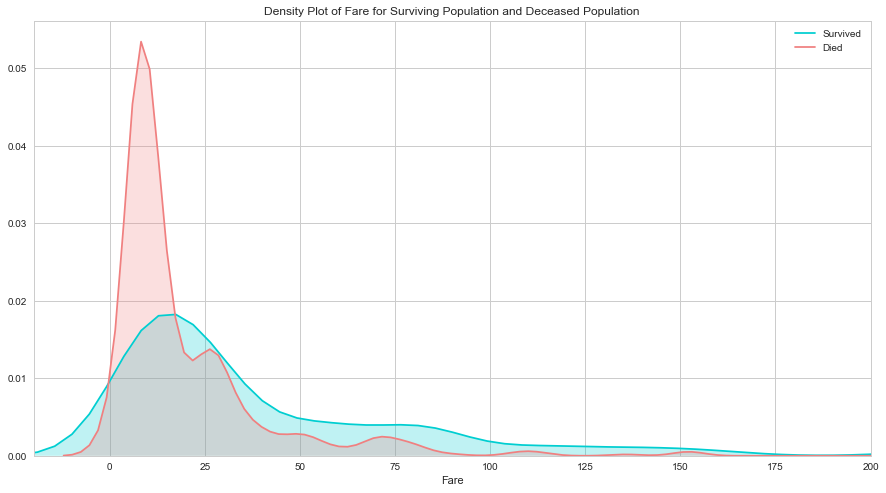

In [76]:
#Exploration of fare
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train['Fare'][final_train.Survived==1],color='darkturquoise',shade=True)
sns.kdeplot(final_train['Fare'][final_train.Survived==0],color='lightcoral',shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

## As the distributions are clearly different for the fares of survivors vs. deceased, it's likely that this would be a significant predictor in our final model. Passengers who paid lower fare appear to have been less likely to survive. 
#This is probably strongly correlated with Passenger Class, which we'll look at next.

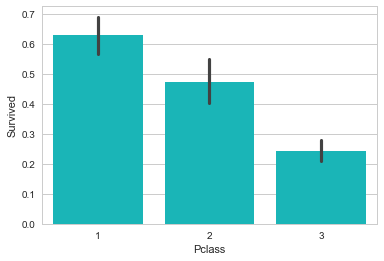

In [80]:
# Exploration of passenger's class
sns.barplot('Pclass','Survived',data=train_df,color='darkturquoise')
#Passenger1 class has survided more

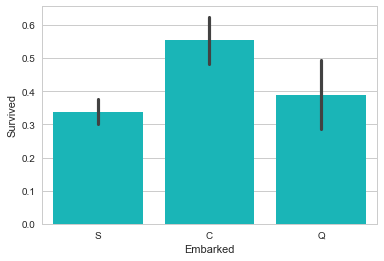

In [81]:
# Exploration of Embarked plot
sns.barplot('Embarked','Survived',data=train_df,color='darkturquoise')


In [ ]:
#Passengers who boarded in Cherbourg, France, appear to have the highest survival rate. 
#Passengers who boarded in Southhampton were marginally less likely to survive than those who boarded in Queenstown. 
#This is probably related to passenger class, or maybe even the order of room assignments (e.g. maybe earlier passengers were more likely to have rooms closer to deck). 
#It's also worth noting the size of the whiskers in these plots. 
#Because the number of passengers who boarded at Southhampton was highest, the confidence around the survival rate is the highest. 
#The whisker of the Queenstown plot includes the Southhampton average, as well as the lower bound of its whisker. 
#It's possible that Queenstown passengers were equally, or even more, ill-fated than their Southhampton counterparts.

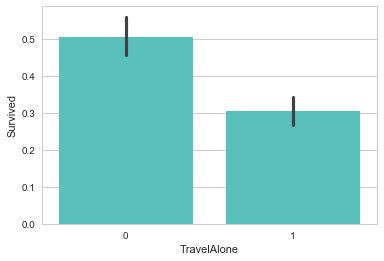

In [82]:
# Exploration of Traveling Alone vs. With Family
sns.barplot('TravelAlone', 'Survived', data=final_train, color="mediumturquoise")
plt.show()

In [ ]:
#Individuals traveling without family were more likely to die in the disaster than those with family aboard. 
#Given the era, it's likely that individuals traveling alone were likely male.

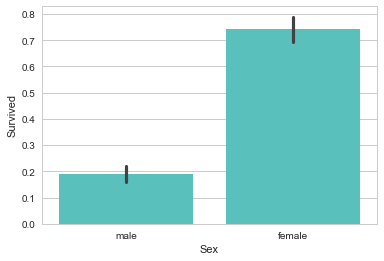

In [83]:
sns.barplot('Sex','Survived',data=train_df,color='mediumturquoise')
plt.show()

# this chart clearly shows that Survival of female is more than male

# Performing Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X = final_train[cols]
Y = final_train['Survived']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# Create a RFE model and select 8 attributes
rfe = RFE(model,8)
rfe = rfe.fit(X,Y)
# summarize the selection of the attributes
print('Selected Features: %s' % list(X.columns[rfe.support_]))

Selected Features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


Optimal number of features: 8
Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


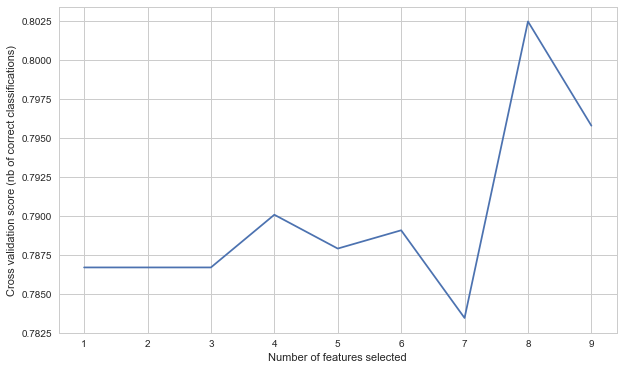

In [87]:
# 4.1.2. Feature ranking with recursive feature elimination and cross-validation
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, Y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


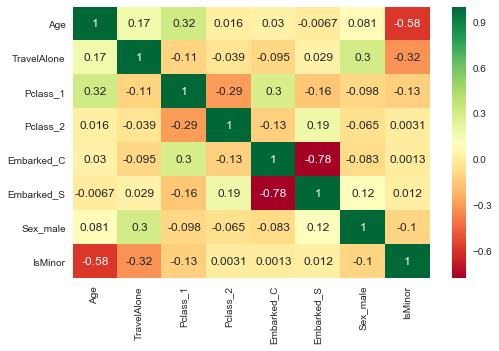

In [89]:
# Finding the corelation
Selected_features = ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 
                     'Embarked_S', 'Sex_male', 'IsMinor']
X = final_train[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

LogisticRegression accuracy is 0.782
LogisticRegression log_loss is 0.504
LogisticRegression auc is 0.839


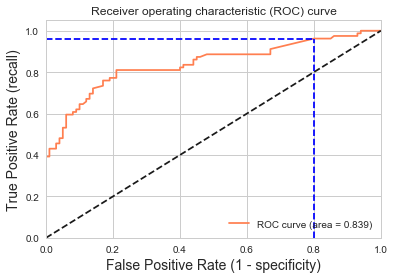

Using a threshold of 0.071 guarantees a sensitivity of 0.962 and a specificity of 0.200, i.e. a false positive rate of 80.00%.


In [92]:
# Splitting into train,test model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X = final_train[Selected_features]
Y = final_train['Survived']
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

# Chcek classfication score of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
Y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr,tpr,thr] = roc_curve(Y_test,Y_pred_proba)
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(Y_test, Y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(Y_test, Y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))


idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [94]:
# Model building using k-flod crossvalidation
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, Y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, Y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, Y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.802
LogisticRegression average log_loss is 0.454
LogisticRegression average auc is 0.850


In [ ]:
# Model evaluation based on K-fold cross-validation using cross_validate() function
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))